# Diabetes Regression 


Analyse exploratoire check-list:
- Identification de la target
- Dimension de la dataset
- Type de données et leurs comprehension (recherche sur internet si necessaire)
- Identification des valeurs manquantes (les NANs) et outliers
- Visualisation de la target et relation entre target et features (histogram, skater, boxplot...)





In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
diabetes = datasets.load_diabetes() 
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
data= diabetes['data']
target = diabetes['target']

In [8]:
print(data.shape)
print(target.shape)

(442, 10)
(442,)


In [9]:
df= pd.DataFrame(data, columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

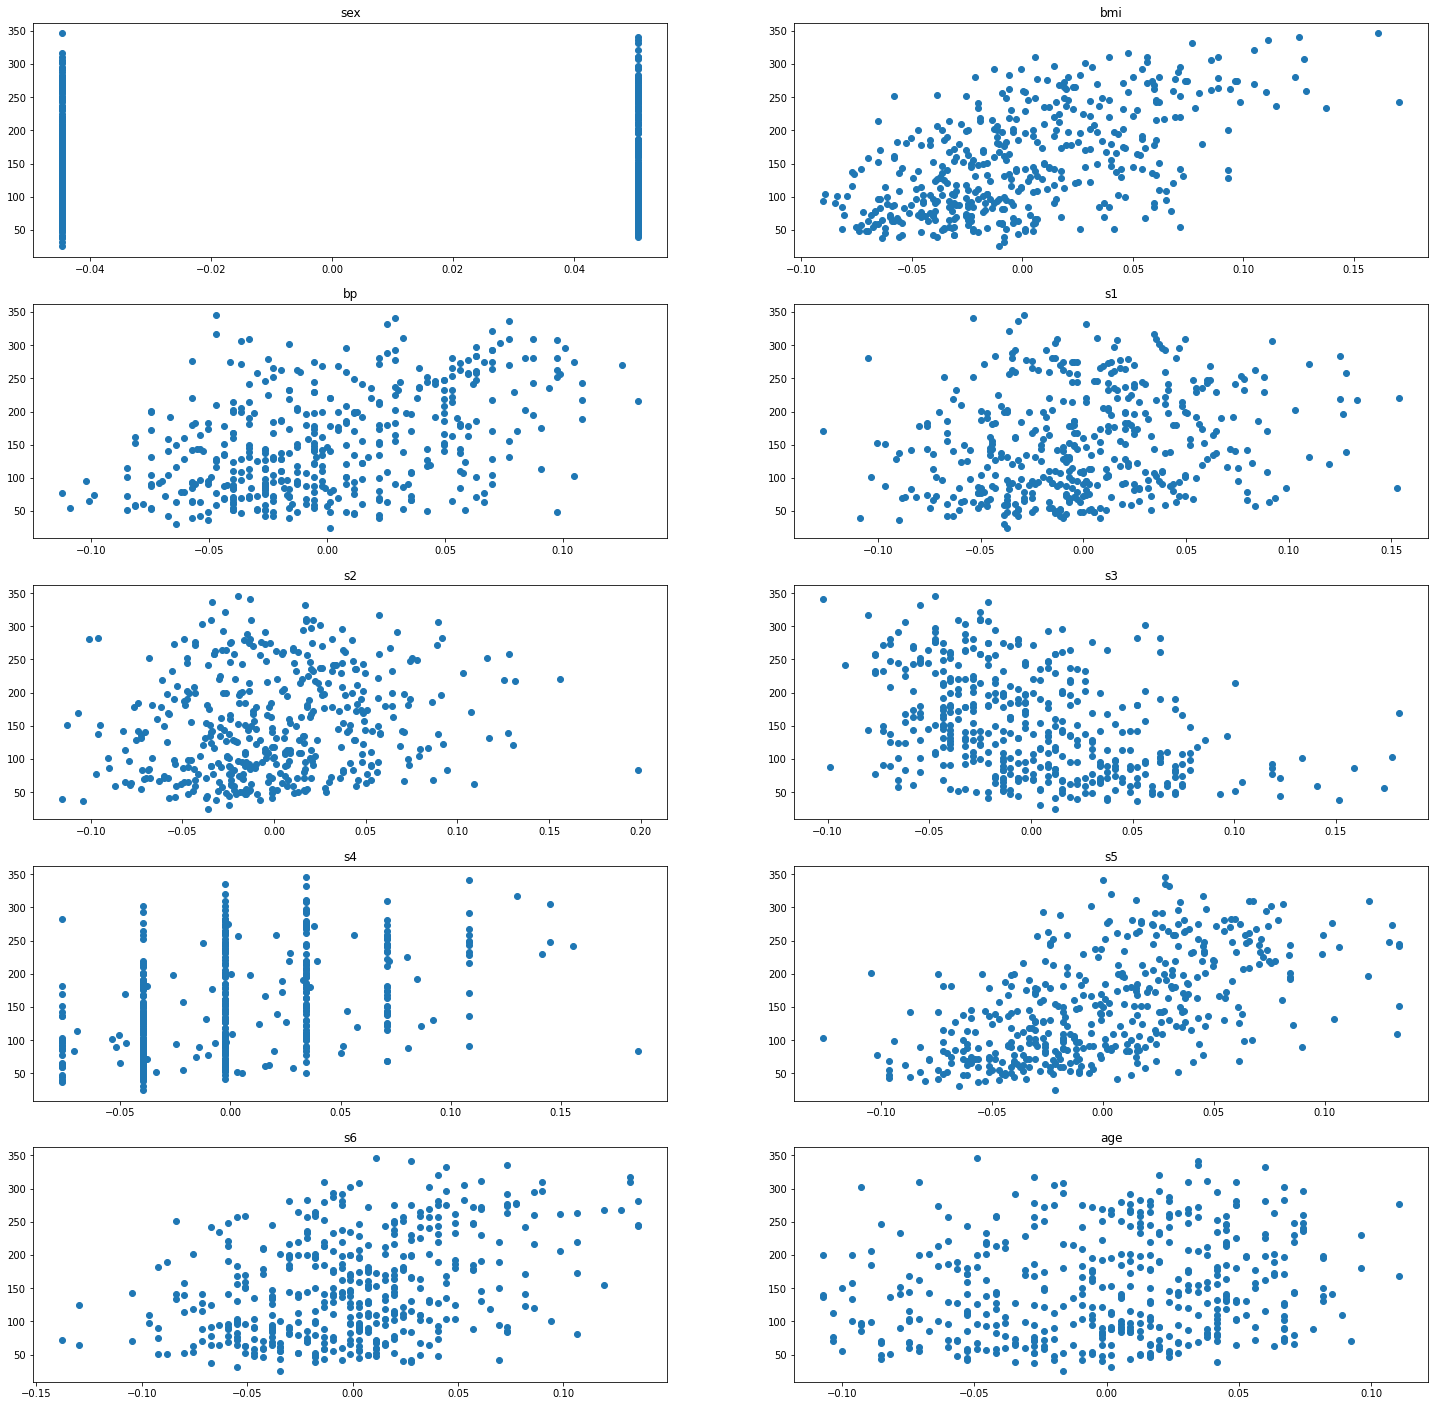

In [13]:
plt.figure(figsize=(25,25))
for i,j in zip(diabetes['feature_names'],range(11)) :
  plt.subplot(f'52{j}')
  plt.scatter(df[i], target)
  plt.title(i)
plt.show()

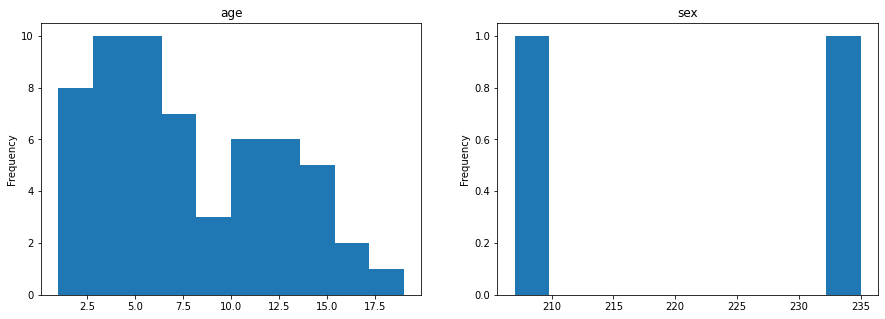

In [19]:
plt.figure(figsize=(15,5))
for i,j in zip(['sex','age'],range(3)) :
  plt.subplot(f'12{j}')
  df[i].value_counts().plot.hist()
  plt.title(i)
plt.show()

Preprocessing : 
- Eliminations des NANs et outliers (dropna ou imputation ...)
- Encodage in case la data n'est pas numerique (characters)
- Feature selection (depending on the exploratory data analysis)
- Spliting data into train and test sets

In [ ]:
df=df.drop(['sex'], axis=1)   # elle n'aide pas aya nhachoha..
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
xtr,xtst,ytr,ytst= train_test_split(df, target, test_size = 0.2)

Model building : 
- Choix du/des modele(s)
- Choix des metriques
- Entrainement du\des modele(s) choisis 
- Optimisation (avec GridSearch matalan)
- Learning Curves


In [ ]:
mdl1 = linear_model.LinearRegression()
mdl1.fit(xtr,ytr)

LinearRegression()

In [ ]:
mdl2 = linear_model.Ridge(alpha=0.5)
mdl2.fit(xtr,ytr)

Ridge(alpha=0.5)

In [ ]:
ypred= mdl1.predict(xtst)
mse=mean_squared_error(ytst, ypred, squared= False)
r2= r2_score(ytst, ypred)
print(mse)
print(r2)

61.16347170223735
0.34530892372628275


In [ ]:
ypred= mdl2.predict(xtst)
mse=mean_squared_error(ytst, ypred, squared= False)
r2= r2_score(ytst, ypred)
print(mse)
print(r2)

60.89027018767401
0.35114453514647503
